# Experiment 2 - Multi alignment of 42 TB genomes

This document is generated with the use of IPython notebooks. The original notebook can be found here: https://github.com/jasperlinthorst/reveal/tree/master/notebooks. Using this notebook, anyone should be able to reproduce the results outlined in this experiment. It does rely on some software to be installed, but this should mostly be clear from the context in the notebook.

Following are some imports of packages we'll need throughout this experiment.

In [2]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
from IPython.display import Image
import seqalign
import reveal

To demonstrate the potential of Reveal to construct graph-based reference genome structures, we would like to construct a population reference graph containing all complete Mycobacterium Tuberculosis genomes available on genbank. Hence, through http://www.ncbi.nlm.nih.gov/genome/genomes/166# we downloaded a list of all known complete TB genomes and stored this in a file called TBgenomes.txt.

Let's download these genomes.

In [2]:
urls=!cut -f 20 TBgenomes.txt
print "Start downloading %d genomes"%len(urls)
for url in urls:
    print "downloading %s ..."%url
    os.system("wget %s/%s_genomic.fna.gz"%(url,url.split("/")[-1]))
print "done"

Start downloading 48 genomes
downloading GenBank FTP ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000195955.2_ASM19595v2 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000008585.1_ASM858v1 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000016145.1_ASM1614v1 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000016925.1_ASM1692v1 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000023625.1_ASM2362v1 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000153685.2_ASM15368v2 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000154585.2_ASM15458v2 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000154605.2_ASM15460v2 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000193185.2_ASM19318v2 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000224435.1_ASM22443v1 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA_000270365.1_ASM27036v1 ...
downloading ftp://ftp.ncbi.nlm.nih.gov/genomes

Unzip and rename files, so they're easier to work with.

In [3]:
!gzip -d *.gz

In [4]:
!for g in $(ls *.fna); do mv $g ${g:0:13}.fasta ; done

In [3]:
!ls -lh GCA_*.fasta

-rw-r--r--  1 jasperlinthorst  staff   4.3M Jul 26 10:35 GCA_000008585.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.3M Jul 26 10:35 GCA_000016145.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.3M Jul 26 10:35 GCA_000016925.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.2M Jul 26 10:35 GCA_000023625.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.3M Jul 26 10:35 GCA_000153685.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.2M Jul 26 10:35 GCA_000154585.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.2M Jul 26 10:36 GCA_000154605.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.3M Jul 26 10:36 GCA_000193185.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.3M Jul 26 10:35 GCA_000195955.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.2M Jul 26 10:36 GCA_000224435.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.2M Jul 26 10:37 GCA_000270345.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.3M Jul 26 10:36 GCA_000270365.fasta
-rw-r--r--  1 jasperlinthorst  staff   4.2M Jul 26 10:37 GCA_000277085.fasta

Now, let's first check if they are truely complete and do not contain any gaps.

In [5]:
genomes=!ls GCA_*.fasta
usable=[]
for genome in genomes:
    i=0
    for name,seq in reveal.fasta_reader(genome):
        i+=1
    if i>1:
        print genome, "has more than 1 contig, reject."
        continue
    As=seq.count("A")
    Cs=seq.count("C")
    Gs=seq.count("G")
    Ts=seq.count("T")
    if len(seq)!=As+Cs+Gs+Ts:
        print genome, "has symbols other than ACGT, reject."
        continue
    usable.append(genome)

GCA_000008585.fasta has symbols other than ACGT, reject.
GCA_000389905.fasta has symbols other than ACGT, reject.
GCA_000572175.fasta has symbols other than ACGT, reject.


Now, for these 44 genomes lets make some MUM plots to check for large structural rearrangements.

In [9]:
ref=usable[0]
for genome in usable[1:]:
    print genome
    !reveal plot {genome} {ref}

1024 max exact matches.
1036 max exact matches.
1101 max exact matches.
998 max exact matches.
1037 max exact matches.
1626 max exact matches.
176 max exact matches.
1029 max exact matches.
2016 max exact matches.
1745 max exact matches.
2600 max exact matches.
3933 max exact matches.
121 max exact matches.
1151 max exact matches.
1159 max exact matches.
2084 max exact matches.
4778 max exact matches.
2229 max exact matches.
1627 max exact matches.
1961 max exact matches.
1604 max exact matches.
1641 max exact matches.
1629 max exact matches.
1602 max exact matches.
1600 max exact matches.
1811 max exact matches.
1681 max exact matches.
1646 max exact matches.
2225 max exact matches.
1616 max exact matches.
129 max exact matches.
463 max exact matches.
398 max exact matches.
1960 max exact matches.
1590 max exact matches.
517 max exact matches.
215 max exact matches.
2309 max exact matches.
2604 max exact matches.
1170 max exact matches.
1238 max exact matches.
1266 max exact matches.


4 structurally different types can be derived from the plots. Two of which are common in this set, two seem to be unique cases (GCA_000193185 and GCA_001544895), lets filter these out to ease downstream analysis and construct a single graph for these two structurally different types.

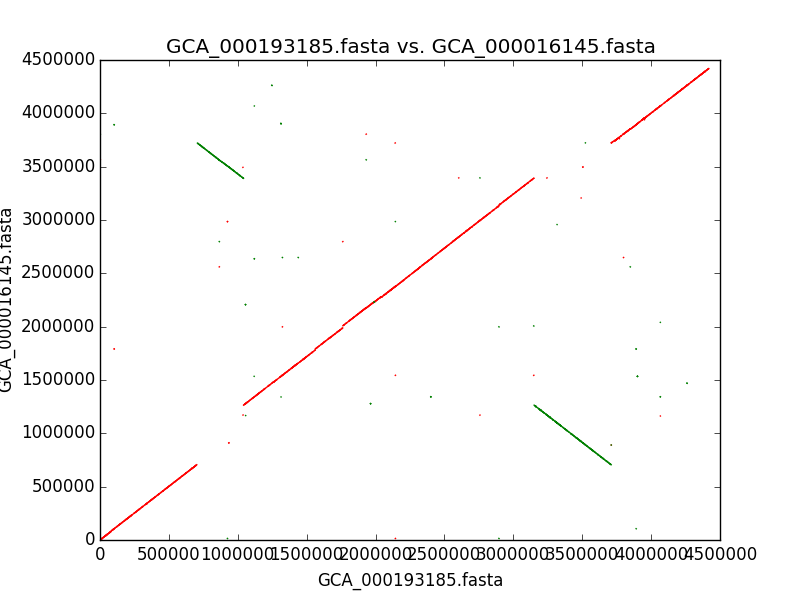

In [8]:
Image("GCA_000193185_%s.png"%usable[0].replace(".fasta",""))

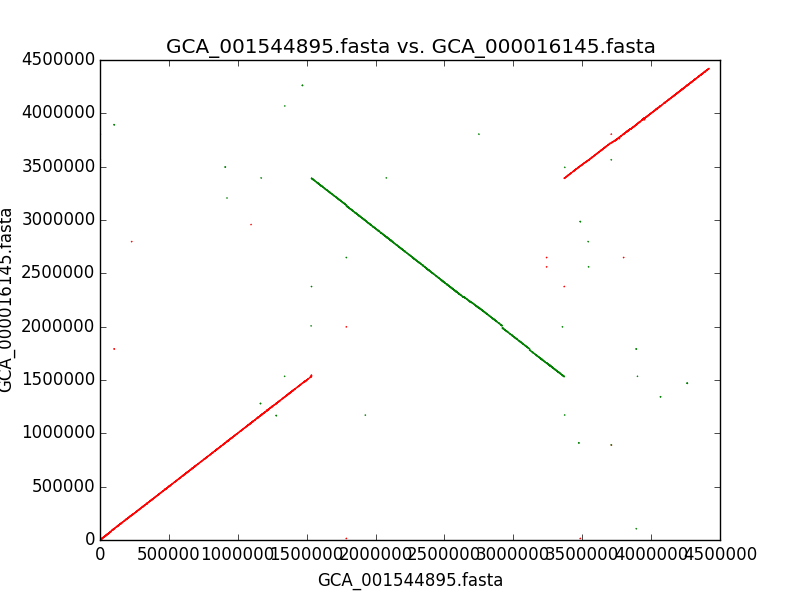

In [9]:
Image("GCA_001544895_%s.png"%usable[0].replace(".fasta",""))

In [10]:
usable.remove('GCA_001544895.fasta')
usable.remove('GCA_000193185.fasta')
len(usable)

42

## Constructing a population reference graph

We've not got a set of 42 complete TB genomes, with two structurally different types. Let's use Reveal to construct a multi-alignment of the entire set, to see if it properly clusters the two structurally different genomes around the inversion, such that we can obtain sequence variations for the two subsets.

In [11]:
!reveal align -o TB42 {" ".join(usable)}

07/26/2016 10:44:33 AM Constructing index...
07/26/2016 10:45:16 AM Done.
07/26/2016 10:45:16 AM Constructing multi-alignment...
07/26/2016 11:47:36 AM Merging nodes...
07/26/2016 11:57:15 AM Done.
07/26/2016 11:57:16 AM Done (94.41% identity, 174627583 bases out of 184970844 aligned, 23124 nodes out of 60241 aligned).
07/26/2016 11:57:16 AM Writing graph...
07/26/2016 11:57:23 AM Done.
07/26/2016 11:57:23 AM Alignment graph written to: TB42.gfa


Extract all bubbles from the multi alignment graph. Use GCA_000016145 as a reference (is possible) for reporting the position of variant calls. 

In [12]:
!reveal bubbles TB42.gfa -r GCA_000016145.fasta > TB42.bubbles

Now, let's see what kind of variants we can detect from this reference graph.

In [32]:
rsnps=[]
rindels=[]
rcomplex=[]
rvar=[]
bubblenodes=set()
complexbubbles=[]
simplebubbles=[]
bubblefile=open("TB42.bubbles",'r')
i=0
pos2bubble=dict()
for line in bubblefile:
    i+=1
    cols=line.split("\t")
    genotypes=set(cols[5].split(","))
    bubblenodes=set([int(x) for x in cols[2].split(',')])
    pos=int(cols[4])
    genome=cols[3]
    pos2bubble[(genome,pos)]=bubblenodes
    if "-" not in genotypes and 'N' not in genotypes:
        if len(set([len(g) for g in genotypes]))==1 and len(next(iter(genotypes)))==1:
            rsnps.append(line)
            simplebubbles.append((genome,pos))
        else:
            rvar.append(line)
            simplebubbles.append((genome,pos))
    elif "-" in genotypes and 'N' not in genotypes:
        rindels.append(line)
        simplebubbles.append((genome,pos))
    elif 'N' in genotypes:
        rcomplex.append(line)
        complexbubbles.append((genome,pos))
    else:
        print line

print "Detected a total of",i,"bubbles"
print "Detected",len(rsnps),"SNPs,",len(rindels),"indels and",len(rvar),"highly variable sites"
print "Detected",len(rcomplex),"complex bubbles"

Detected a total of 19208 bubbles
Detected 7882 SNPs, 4943 indels and 5084 highly variable sites
Detected 1299 complex bubbles


Of these highly variable sites, how many haplotypes do we see here. Since, if we see 42 different haplotypes, we know we're not really aligning anything anymore.

In [33]:
rvarlengths=[]
for var in rvar:
    haplotypes=var.split()[5].split(",")
    rvarlengths.append(len(haplotypes))

print "Minimal number of haplotypes at variable sites: ",min(rvarlengths)
print "Maximal number of haplotypes at variable sites: ",max(rvarlengths)

Minimal number of haplotypes at variable sites:  2
Maximal number of haplotypes at variable sites:  7


Let's have a look at what some of these sites look like.

In [34]:
i=range(0,len(rvarlengths))
i=sorted(i,key=lambda l: rvarlengths[l])
for x in i[-5:]:
    print "---"
    for v in rvar[x].split()[5].split(","):
        print v

---
GTGTTGTGCCCCTGC
GTGTTGTGCCCCTCC
GTGTTGTGCCCCTGCC
GTGTTGC
GTGTTGTGCCCCTG
ATGTTGTGCCCCTGC
---
ACGCACCCCCGCCGC
A
ACGCACCCCGCCG
ACGCACCCCCGCCG
CGCACCCCCGCCGC
ACCCCCCCGCCGC
---
CGTCCGACGCCCCC
CGCCCGACGCCCCC
GGTCCGACGACCCA
CGCCCGACGCCCCA
CGTCCGACGACCCA
CGTCCGACGCCCCA
---
CCGCCGGAGCTCGAATTCCCGCCGCCGCCGCCGCCAAC
CCGCCCGGCGCCGCCGTCGCCCCGGTACCGGCGCCAAA
CCGCCGGTGCCGCCGGTGCCGCCGGCACCGGTGCCAAA
CCGCCGACACCGCCATTGCCGCCGGTACCGGCGCCAAA
CCGCCGACACCGCCATAACCTCCGGTACCGGCGCCAAA
GGGACCGAGCTCGAATTCCCACCGGTGTCAGCGCCAAA
---
GCCGGCGGGGCCGGCGGCCGGGCCTGGCTGTGGGGCACCGGCGGGGCCGGCGGAGCCGGCGGGGCCGGCGGCCGGGCCTGGCTGTGGGGCACCGGCG
GCCGGCGGGGCCGGCGGCCGGGCCTGGCTGTGGGGCACCGGCG
CCGGCGGGGCCGGCGGCCGGGCCTGGCTGTGGGGCACCGGCG
GCCGGCGGGGCCGGCGGCCGGGCCTACCTGTGGGGCACCGGCG
GCCGGCGGGCCGGCGGCCGGGCCTGGCTGTGGGGCACCGGCG
GCCGGCGGGGCCGGCGGCCGGGCCGGGCTGTGGGGCAACGGCG
GCCGGCGGGGCCGGCGGCCGGGCCTGGCTGTGGGGCACCGGC


We expect the largest bubble to represent the ~2.5MB inversion, containing nested bubbles, indicating smaller variations between the two subsets of genomes. Let's inspect where the largest bubble starts and check if this is conform what we could see from the mumplots.

Largest bubble starts at 933466 in genome GCA_000016145.fasta and contains 31420 nodes


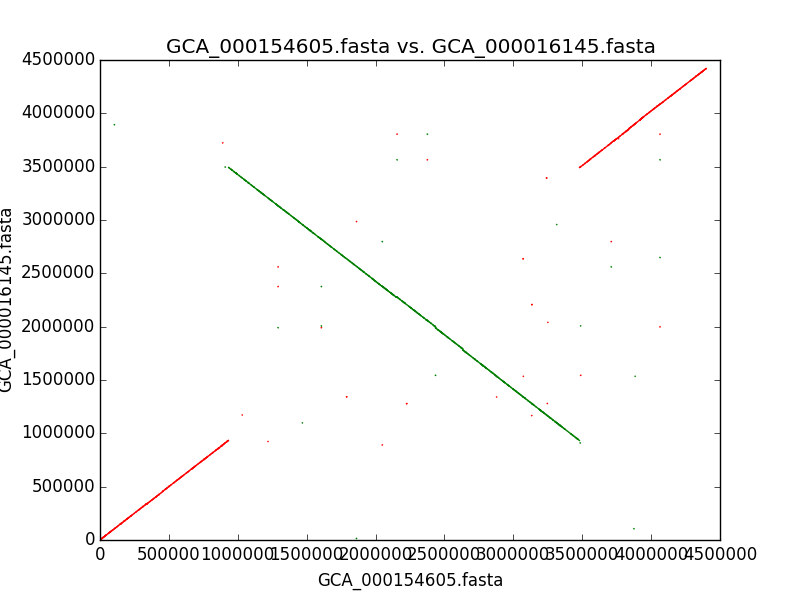

In [14]:
l=list(complexbubbles)
ll=[len(pos2bubble[(genome,pos)]) for genome,pos in l]
p=np.argmax(ll)
print "Largest bubble starts at %s in genome %s and contains %s nodes"%(l[p][1], l[p][0], ll[p])
Image("GCA_000154605_GCA_000016145.png")

That seems to be conform what we can also see in the mumplot.

Let's visualise some smaller complex bubbles.

set([60167, 60168, 60169, 60170, 60171, 60172, 60173, 60174, 60175, 60176, 60177, 60178, 60179])


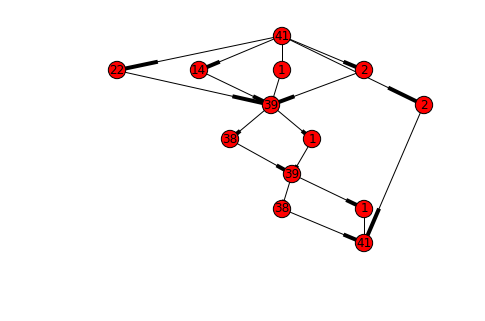

In [54]:
%matplotlib inline
G=nx.DiGraph()
reveal.read_gfa("TB42.gfa",None,None,G)
i=1
print pos2bubble[complexbubbles[i]]
sg=G.subgraph(pos2bubble[complexbubbles[i]])
nx.write_dot(sg,'tmp.dot')
pos=nx.graphviz_layout(sg,prog='dot')
labels=dict()
for node,data in sg.nodes(data=True):
    labels[node]=len(data['sample'])
nx.draw(sg,pos=pos,labels=labels,arrows=True)

The graph above shows a complex bubble structure. Node labels indicate the number of genomes in which a specific node sequence is observed. Here, 2 locally identical genomes were split of, resulting in 3 nested simple bubble structures, describing sequence variation in the set of 39 genomes.

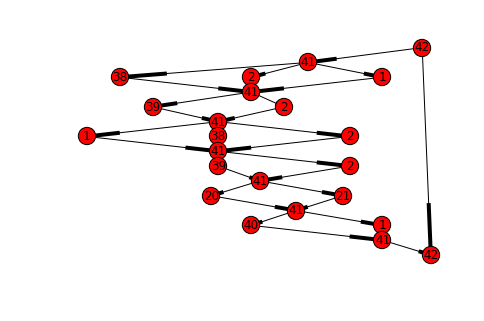

In [84]:
%matplotlib inline
sg=G.subgraph(pos2bubble[complexbubbles[1283]])
nx.write_dot(sg,'tmp.dot')
pos=nx.graphviz_layout(sg,prog='dot')
labels=dict()
for node,data in sg.nodes(data=True):
    labels[node]=len(data['sample'])
nx.draw(sg,pos=pos,labels=labels,arrows=True)

Graph above shows a region that has been deleted in one genome, but where the other 41 genomes still contain sequence variations.

As an example, let's also plot a simple bubble.

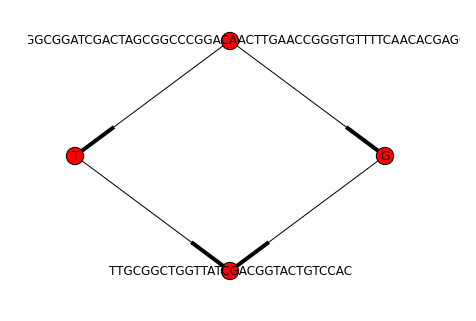

In [85]:
%matplotlib inline
sg=G.subgraph(pos2bubble[simplebubbles[0]])
nx.write_dot(sg,'test.dot')
pos=nx.graphviz_layout(sg,prog='dot')
labels=dict()
for node,data in sg.nodes(data=True):
    labels[node]=data['seq']
nx.draw(sg,pos=pos,labels=labels,arrows=True)

Graph above shows a simple SNP.

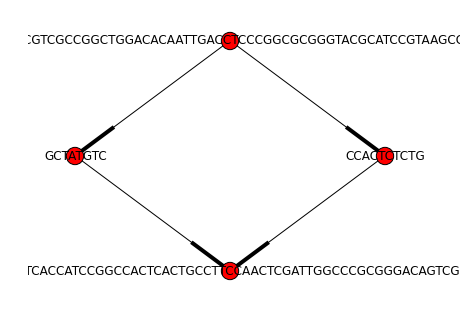

In [86]:
%matplotlib inline
sg=G.subgraph(pos2bubble[simplebubbles[4]])
nx.write_dot(sg,'test.dot')
pos=nx.graphviz_layout(sg,prog='dot')
labels=dict()
for node,data in sg.nodes(data=True):
    labels[node]=data['seq']
nx.draw(sg,pos=pos,labels=labels,arrows=True)

Graph above show a highly variable site

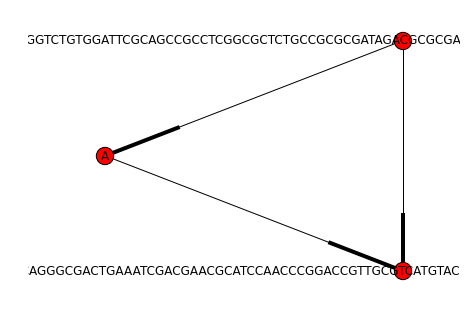

In [87]:
%matplotlib inline
sg=G.subgraph(pos2bubble[simplebubbles[13]])
nx.write_dot(sg,'test.dot')
pos=nx.graphviz_layout(sg,prog='dot')
labels=dict()
for node,data in sg.nodes(data=True):
    labels[node]=data['seq']
nx.draw(sg,pos=pos,labels=labels,arrows=True)

Graph above shows an indel.

## Progressively align genomes back to the reference graph

Now, to test how much information we're losing with the progressive alignment approach, we hope to see that mapping any of the genomes contained in the population reference will follow exactly one path through the graph without introducing new nodes/bubbles.

Map all genomes back to the graph, but use a different name for the genomes, so we can distinguish between the two.

In [17]:
for genome in usable:
    !cp {genome} _{genome}
    !reveal align TB42.gfa _{genome} 2>&1 | grep "identity\|written"

07/26/2016 12:07:40 PM Done (98.68% identity, 4361770 bases out of 4419977 aligned, 21996 nodes out of 60261 aligned).
07/26/2016 12:07:43 PM Alignment graph written to: TB42__GCA_000016145.gfa
07/26/2016 12:09:28 PM Done (98.63% identity, 4363666 bases out of 4424435 aligned, 21959 nodes out of 60276 aligned).
07/26/2016 12:09:32 PM Alignment graph written to: TB42__GCA_000016925.gfa
07/26/2016 12:10:47 PM Done (99.37% identity, 4370635 bases out of 4398250 aligned, 10294 nodes out of 60253 aligned).
07/26/2016 12:10:50 PM Alignment graph written to: TB42__GCA_000023625.gfa
07/26/2016 12:12:42 PM Done (98.64% identity, 4348240 bases out of 4408224 aligned, 21889 nodes out of 60258 aligned).
07/26/2016 12:12:46 PM Alignment graph written to: TB42__GCA_000153685.gfa
07/26/2016 12:13:59 PM Done (99.36% identity, 4366978 bases out of 4394985 aligned, 10290 nodes out of 60254 aligned).
07/26/2016 12:14:02 PM Alignment graph written to: TB42__GCA_000154585.gfa
07/26/2016 12:15:19 PM Done (9

Ok, so some mis-alignments do arise, otherwise we would find 100% identity after alignment. Let's inspect the bubbles that arise due to this problem. So, find all nodes where 'GCA_001544985.fasta' and 'tmp' are NOT joined. Then, extract the bubbles that enclose these nodes and visualise them.

In [18]:
for genome in usable:
    mismatch=[]
    G=nx.DiGraph()
    reveal.read_gfa("TB42__%s"%genome.replace(".fasta",".gfa"),None,None,G)
    for node,data in G.nodes(data=True):
        s=set([genome,'_'+genome])
        if len(s.intersection(data['sample']))==1:
            mismatch.append(node)
    print "For %s, %d nodes were not properly aligned."%(genome,len(mismatch))

For GCA_000016145.fasta, 148 nodes were not properly aligned.
For GCA_000016925.fasta, 126 nodes were not properly aligned.
For GCA_000023625.fasta, 73 nodes were not properly aligned.
For GCA_000153685.fasta, 85 nodes were not properly aligned.
For GCA_000154585.fasta, 77 nodes were not properly aligned.
For GCA_000154605.fasta, 48 nodes were not properly aligned.
For GCA_000195955.fasta, 40 nodes were not properly aligned.
For GCA_000224435.fasta, 86 nodes were not properly aligned.
For GCA_000270345.fasta, 33 nodes were not properly aligned.
For GCA_000270365.fasta, 61 nodes were not properly aligned.
For GCA_000277085.fasta, 71 nodes were not properly aligned.
For GCA_000277105.fasta, 97 nodes were not properly aligned.
For GCA_000277735.fasta, 49 nodes were not properly aligned.
For GCA_000331445.fasta, 110 nodes were not properly aligned.
For GCA_000350205.fasta, 131 nodes were not properly aligned.
For GCA_000364825.fasta, 96 nodes were not properly aligned.
For GCA_000389925.fa

In [19]:
for genome in usable:
    !reveal realign TB42__{genome.replace('.fasta','.gfa')} --all

In [20]:
for genome in usable:
    mismatch=[]
    G=nx.DiGraph()
    reveal.read_gfa("TB42__%s"%genome.replace(".fasta",".realigned.gfa"),None,None,G)
    for node,data in G.nodes(data=True):
        s=set([genome,'_'+genome])
        if len(s.intersection(data['sample']))==1:
            mismatch.append(node)
    print "For %s, %d nodes were not properly aligned."%(genome,len(mismatch))

For GCA_000016145.fasta, 0 nodes were not properly aligned.
For GCA_000016925.fasta, 0 nodes were not properly aligned.
For GCA_000023625.fasta, 0 nodes were not properly aligned.
For GCA_000153685.fasta, 0 nodes were not properly aligned.
For GCA_000154585.fasta, 0 nodes were not properly aligned.
For GCA_000154605.fasta, 0 nodes were not properly aligned.
For GCA_000195955.fasta, 0 nodes were not properly aligned.
For GCA_000224435.fasta, 0 nodes were not properly aligned.
For GCA_000270345.fasta, 0 nodes were not properly aligned.
For GCA_000270365.fasta, 0 nodes were not properly aligned.
For GCA_000277085.fasta, 0 nodes were not properly aligned.
For GCA_000277105.fasta, 0 nodes were not properly aligned.
For GCA_000277735.fasta, 0 nodes were not properly aligned.
For GCA_000331445.fasta, 0 nodes were not properly aligned.
For GCA_000350205.fasta, 0 nodes were not properly aligned.
For GCA_000364825.fasta, 0 nodes were not properly aligned.
For GCA_000389925.fasta, 0 nodes were no

So after realigning the complex subgraphs of the graph, all alternate paths spelling the same sequence are gone. The only problem for now, in progressively obtaining multi-alignments on this scale, then probably is due to the fact that the branching which is caused by selecting multi-mums which only occur in subsets of the input samples. As the parameters that determine which multi-mum to select changes when adding more genomes, this results in different branching.

To test this a bit more, we can also construct a graph in which we only allow the alignment of multi-mums that occur in all samples, such that no complex bubbles occur. Mapping the genomes back to this graph, should then also be flawless.

In [21]:
!reveal align -o TB42.n42 -n42 {" ".join(usable)}

07/26/2016 04:50:36 PM Constructing index...
07/26/2016 04:51:19 PM Done.
07/26/2016 04:51:19 PM Constructing multi-alignment...
07/26/2016 05:20:03 PM Merging nodes...
07/26/2016 05:20:18 PM Done.
07/26/2016 05:20:19 PM Done (37.50% identity, 69374088 bases out of 185007375 aligned, 7829 nodes out of 23710 aligned).
07/26/2016 05:20:19 PM Writing graph...
07/26/2016 05:20:22 PM Done.
07/26/2016 05:20:22 PM Alignment graph written to: TB42.n42.gfa


As we can see the identity of the aligned genomes is much lower, probably due to the fact that the large inversion prevents the alignment of 2.5MB of all genomes in the graph. None te less, lets see what happens when we align genomes back to this graph.

In [27]:
for genome in usable:
    !cp {genome} _{genome}
    !reveal align TB42.n42.gfa _{genome} 2>&1 | grep "identity\|written"

07/26/2016 10:06:49 PM Done (100.00% identity, 4419977 bases out of 4419977 aligned, 14479 nodes out of 23710 aligned).
07/26/2016 10:06:52 PM Alignment graph written to: TB42.n42__GCA_000016145.gfa
07/26/2016 10:09:13 PM Done (100.00% identity, 4424435 bases out of 4424435 aligned, 14478 nodes out of 23710 aligned).
07/26/2016 10:09:16 PM Alignment graph written to: TB42.n42__GCA_000016925.gfa
07/26/2016 10:11:37 PM Done (100.00% identity, 4398250 bases out of 4398250 aligned, 14478 nodes out of 23710 aligned).
07/26/2016 10:11:40 PM Alignment graph written to: TB42.n42__GCA_000023625.gfa
07/26/2016 10:14:01 PM Done (100.00% identity, 4408224 bases out of 4408224 aligned, 14477 nodes out of 23710 aligned).
07/26/2016 10:14:04 PM Alignment graph written to: TB42.n42__GCA_000153685.gfa
07/26/2016 10:16:25 PM Done (100.00% identity, 4394985 bases out of 4394985 aligned, 14478 nodes out of 23710 aligned).
07/26/2016 10:16:28 PM Alignment graph written to: TB42.n42__GCA_000154585.gfa
07/26

In [28]:
for genome in usable:
    mismatch=[]
    G=nx.DiGraph()
    reveal.read_gfa("TB42.n42__%s"%genome.replace(".fasta",".gfa"),None,None,G)
    for node,data in G.nodes(data=True):
        s=set([genome,'_'+genome])
        if len(s.intersection(data['sample']))==1:
            mismatch.append(node)
    print "For %s, %d nodes were not properly aligned."%(genome,len(mismatch))

For GCA_000016145.fasta, 0 nodes were not properly aligned.
For GCA_000016925.fasta, 0 nodes were not properly aligned.
For GCA_000023625.fasta, 0 nodes were not properly aligned.
For GCA_000153685.fasta, 0 nodes were not properly aligned.
For GCA_000154585.fasta, 0 nodes were not properly aligned.
For GCA_000154605.fasta, 0 nodes were not properly aligned.
For GCA_000195955.fasta, 0 nodes were not properly aligned.
For GCA_000224435.fasta, 0 nodes were not properly aligned.
For GCA_000270345.fasta, 0 nodes were not properly aligned.
For GCA_000270365.fasta, 0 nodes were not properly aligned.
For GCA_000277085.fasta, 0 nodes were not properly aligned.
For GCA_000277105.fasta, 0 nodes were not properly aligned.
For GCA_000277735.fasta, 0 nodes were not properly aligned.
For GCA_000331445.fasta, 0 nodes were not properly aligned.
For GCA_000350205.fasta, 0 nodes were not properly aligned.
For GCA_000364825.fasta, 0 nodes were not properly aligned.
For GCA_000389925.fasta, 0 nodes were no

So, indeed, all genomes map perfectly.

By locally realigning complex structures of the graph, or preventing the formation of complex bubbles. We can obtain high quality multi-genome alignments in a progressive way, such that we overcome the memory bottleneck that is required for multi-aligning very large numbers of genomes.